# EDA Air quality 

In [47]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

# plots 
sns.set_context('talk', font_scale=1)
plt.style.use(['dark_background'])
#plt.rcParams['image.cmap'] = "orangered"


In [48]:
# import data
data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data = pd.read_csv('data/data_51.csv', index_col=[0])
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


In [49]:
# name of columns
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


In [50]:
mean_features.append('target')
#sns.pairplot(data[mean_features])


Text(0.5, 0, 'PM2.5 µm/m3')

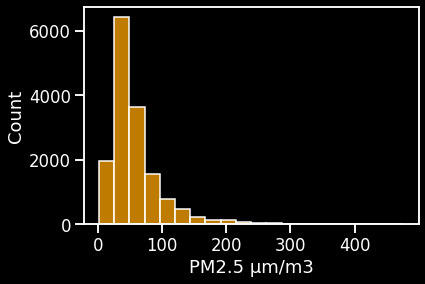

In [51]:
# overview of the target 
p = sns.histplot(data.target, bins=20, color=['orange'])  # TODO bins passend zu der Klassifizierung
p.set_xlabel('PM2.5 µm/m3')


#### EDA on precipitation

In [52]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0,0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100
#data['sum_precip'] = data['precip'].apply(lambda x: np.sum(x))

<AxesSubplot:xlabel='mean_precip', ylabel='target'>

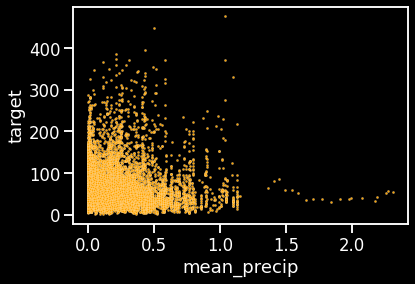

In [53]:
sns.scatterplot(data=data, x='mean_precip', y='target', color='orange',s=5)

In [54]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

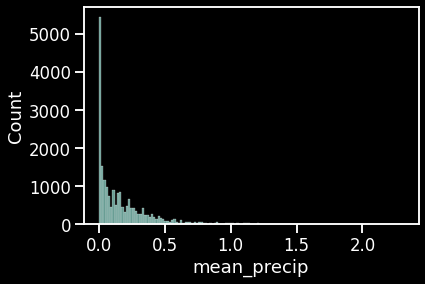

In [55]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesnt rain

In [56]:
precip_stats.r_std_precip.sort_values(ascending=False)[:3]

8729    1095.445115
4436    1095.445115
534     1095.445115
Name: r_std_precip, dtype: float64

In [57]:
precip_stats.values[3]

array([ 25.787     ,   0.        ,   1.12727273,   3.73988635,
        13.98674993,   0.        ,  25.787     , 331.76411197])

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [58]:
# EDA humidity:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

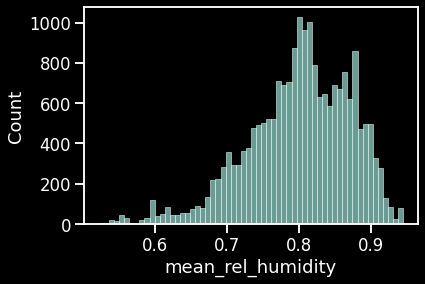

In [59]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

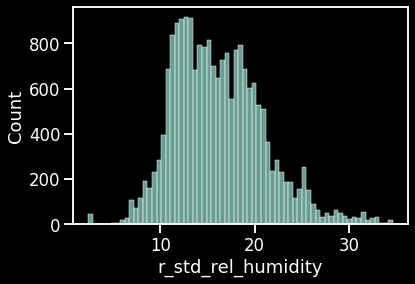

In [60]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

### EDA on wind speed

In [61]:
# EDA wind speed on metres per second:
wind_spd_stats = pd.concat([data.max_wind_spd, 
                        data.min_wind_spd, 
                        data.mean_wind_spd, 
                        data.std_wind_spd, 
                        data.var_wind_spd, 
                        data.median_wind_spd,  # all 0
                        data.ptp_wind_spd],
                        axis=1)
wind_spd_stats['r_std_wind_spd'] = wind_spd_stats['std_wind_spd'] / wind_spd_stats['mean_wind_spd'] * 100

<AxesSubplot:xlabel='mean_wind_spd', ylabel='Count'>

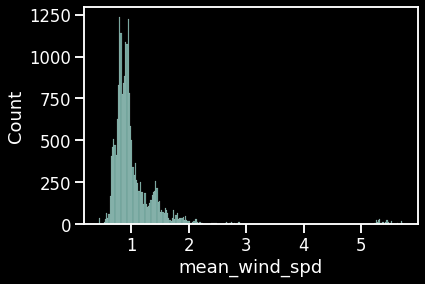

In [62]:
sns.histplot(wind_spd_stats.mean_wind_spd) # 5m/2 means Beafourt 3 -> leichte brise

<AxesSubplot:xlabel='r_std_wind_spd', ylabel='Count'>

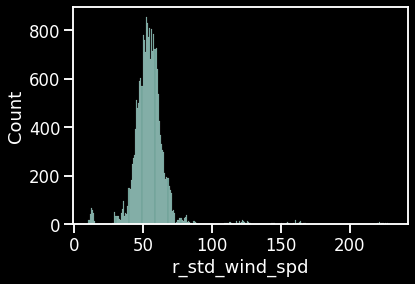

In [63]:
sns.histplot(wind_spd_stats.r_std_wind_spd)

#### atmos_press: mean atmospheric pressure(atm)*

[(87.5, 91.0)]

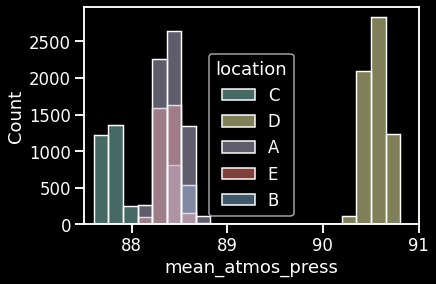

In [64]:
p = sns.histplot(data=data , x = 'mean_atmos_press', hue='location')
p.set(xlim=(87.5, 91))


![](pictures/location_atmps_press.png)

mean_atmos_press depends on the location. 
?needs to level?

In [65]:
del data

on data process